In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import cv2
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
import numpy as np
import os
from time import perf_counter
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
import time
from timeit import default_timer as timer
import math
from sklearn.decomposition import PCA
from mtcnn.mtcnn import MTCNN
from random import choice
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from os import listdir
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from keras.models import load_model
from faced import FaceDetector
from faced.utils import annotate_image
%matplotlib notebook

Using TensorFlow backend.


In [2]:
# Global variables and definitions
face_detector = FaceDetector()
model_path = '/home/knnan/Development/face_recognition/Facenet/keras-facenet/model/facenet_keras.h5'
model = load_model(model_path)
face_embeddings_file = '/home/knnan/Development/face_recognition/Facenet/all_faces_embeddings.npz'
pre_embeddings_data = load(face_embeddings_file)
print("Model has Loaded")







Model has Loaded


/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
def euc(a,b):
    dst = distance.euclidean(a, b)
    return dst

In [4]:
# print(pre_embeddings_data['arr_0'][0])
data = pre_embeddings_data

trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

for i in range(trainX.shape[0]-1):
    for j in range(testX.shape[0] -1):
        print(euc(trainX[i],testX[j]),trainy[i],testy[j],sep=' ')
    

# euc(pre_embeddings_data['arr_0'][0],pre_embeddings_data['arr_2'][0])


4.633092880249023 Hameem Hameem
4.305062294006348 Hameem Hameem
4.3238844871521 Hameem Hameem
0.0 Hameem Hameem
11.898567199707031 Hameem Abdullah
12.348001480102539 Hameem Abdullah
13.762742042541504 Hameem Abdullah
12.71144962310791 Hameem Abdullah
12.619597434997559 Hameem Nishad
12.26473331451416 Hameem Nishad
11.9624662399292 Hameem Nishad
12.339953422546387 Hameem Nishad
12.102745056152344 Hameem Nishad
11.978240966796875 Hameem Nishad
12.556986808776855 Hameem Nishad
2.882966995239258 Hameem Hameem
0.0 Hameem Hameem
3.429013252258301 Hameem Hameem
4.305062294006348 Hameem Hameem
11.906593322753906 Hameem Abdullah
11.988127708435059 Hameem Abdullah
14.025696754455566 Hameem Abdullah
12.315500259399414 Hameem Abdullah
12.497879028320312 Hameem Nishad
12.278247833251953 Hameem Nishad
12.046448707580566 Hameem Nishad
12.509514808654785 Hameem Nishad
12.100505828857422 Hameem Nishad
11.970268249511719 Hameem Nishad
12.523887634277344 Hameem Nishad
2.981062173843384 Hameem Hameem
3.42

In [5]:
in_encoder = Normalizer(norm='l2')
print(trainy)
trainX = in_encoder.transform(trainX)


['Hameem' 'Hameem' 'Hameem' 'Hameem' 'munirul' 'munirul' 'munirul'
 'munirul' 'Abdullah' 'Abdullah' 'Abdullah' 'Abdullah' 'toufiq' 'Nishad'
 'Nishad' 'Nishad' 'Nishad' 'Nishad' 'Nishad']


Hameem
Hameem
Hameem
Hameem
munirul
munirul
munirul
munirul
Abdullah
Abdullah
Abdullah
Abdullah
toufiq
Nishad
Nishad
Nishad
Nishad
Nishad
Nishad
[array([ 0.12444551, -0.04808804,  0.00033398,  0.05448524, -0.00814302,
        0.0993342 , -0.05742149, -0.12658252,  0.05800844,  0.06518998,
       -0.14255662, -0.04762699, -0.03086714, -0.05159939,  0.06878399,
        0.00372778,  0.1066353 ,  0.08166286,  0.02999253, -0.07199243,
        0.10032801, -0.06043714,  0.10162897,  0.01797566, -0.03175441,
        0.12261476, -0.1103695 ,  0.01715428, -0.04463387,  0.09914241,
        0.06179135, -0.01382082, -0.21110173,  0.15370001,  0.21007901,
       -0.05744436, -0.05989505, -0.06401564,  0.14590797,  0.07693643,
       -0.14381012, -0.0171214 ,  0.2248294 , -0.13745569,  0.11061407,
        0.10729294,  0.02931175,  0.06519355, -0.09800217,  0.04060139,
        0.0562949 , -0.251426  , -0.11272599,  0.08550988,  0.08935807,
       -0.13188356,  0.05975243, -0.06127455,  0.04928077, -0.

<IPython.core.display.Javascript object>


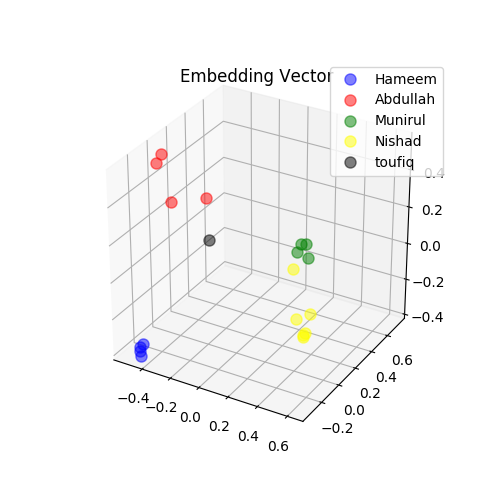

<IPython.core.display.Javascript object>


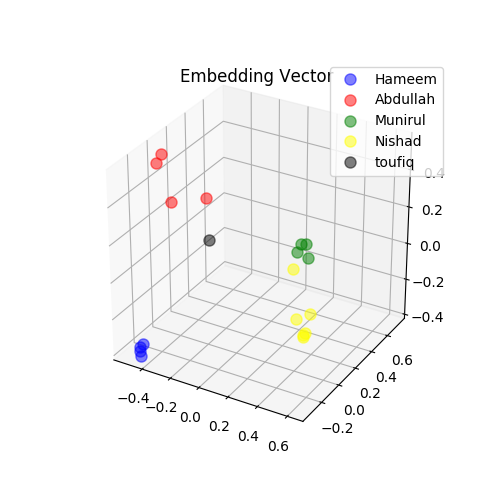

<IPython.core.display.Javascript object>


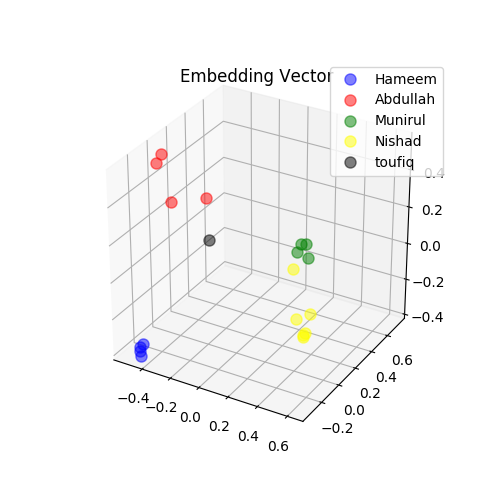

In [12]:
pca = PCA(n_components=3).fit(trainX)


X_Hameem = []
X_Munirul = []
X_Abdullah = []
X_Nishad = []
X_toufiq = []



for emb,name in zip(trainX,trainy):
    print(name)
    if name == 'Hameem':
        X_Hameem.append(emb)
    elif name == 'munirul':
        X_Munirul.append(emb)
    elif name == 'Abdullah':
        X_Abdullah.append(emb)
    elif name == 'Nishad':
        X_Nishad.append(emb)
    elif name == 'toufiq':
        X_toufiq.append(emb)
        
        
Xd_Hameem = pca.transform(X_Hameem)
Xd_Abdullah = pca.transform(X_Abdullah)
Xd_Munirul = pca.transform(X_Munirul)
Xd_Nishad = pca.transform(X_Nishad)
Xd_toufiq = pca.transform(X_toufiq)

print(X_toufiq)
print(Xd_Hameem[:,0])
for i in range(3):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10   
    ax.plot(Xd_Hameem[:,0], Xd_Hameem[:,1], Xd_Hameem[:,2],
            'o', markersize=8, color='blue', alpha=0.5, label='Hameem')
    ax.plot(Xd_Abdullah[:,0], Xd_Abdullah[:,1], Xd_Abdullah[:,2],
            'o', markersize=8, color='red', alpha=0.5, label='Abdullah')
    ax.plot(Xd_Munirul[:,0], Xd_Munirul[:,1], Xd_Munirul[:,2],
            'o', markersize=8, color='green', alpha=0.5, label='Munirul')
    ax.plot(Xd_Nishad[:,0], Xd_Nishad[:,1], Xd_Nishad[:,2],
            'o', markersize=8, color='yellow', alpha=0.5, label='Nishad')
    ax.plot(Xd_toufiq[:,0], Xd_toufiq[:,1], Xd_toufiq[:,2],
            'o', markersize=8, color='black', alpha=0.5, label='toufiq')

    plt.title('Embedding Vector')
    ax.legend(loc='upper right')

plt.show()

